# Statement

The Sure Tomorrow insurance company wants to solve several tasks with the help of Machine Learning and you are asked to evaluate that possibility.

- Task 1: Find customers who are similar to a given customer. This will help the company's agents with marketing.
- Task 2: Predict whether a new customer is likely to receive an insurance benefit. Can a prediction model do better than a dummy model?
- Task 3: Predict the number of insurance benefits a new customer is likely to receive using a linear regression model.
- Task 4: Protect clients' personal data without breaking the model from the previous task. It's necessary to develop a data transformation algorithm that would make it hard to recover personal information if the data fell into the wrong hands. This is called data masking, or data obfuscation. But the data should be protected in such a way that the quality of machine learning models doesn't suffer. You don't need to pick the best model, just prove that the algorithm works correctly.

# Data Preprocessing & Exploration

## Initialization

In [110]:
pip install scikit-learn --upgrade

Note: you may need to restart the kernel to use updated packages.


In [111]:
import numpy as np
import pandas as pd
import math
import seaborn as sns
import random
import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
import sklearn.preprocessing
from sklearn.neighbors import RadiusNeighborsClassifier
from sklearn.model_selection import train_test_split
import itertools
from IPython.display import display

## Load Data

Load data and conduct a basic check that it's free from obvious issues.

In [112]:
# load the DF
df = pd.read_csv('https://code.s3.yandex.net/datasets/insurance_us.csv')
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

# we may want to fix the age type (from float to int) though this is not critical
# checking all age values are integers indeed and do the conversion if so
if (df['age'] % 1 > 0).sum() == 0: df['age'] = df['age'].astype('int')

df.sample(5)

,gender,age,income,family_members,insurance_benefits
889,1,33,28000.0,2,0
3781,0,32,42100.0,0,0
2161,1,39,36000.0,0,0
1731,0,24,43200.0,2,0
1539,0,18,42400.0,1,0


We rename the colums to make the code look more consistent with its style.

In [113]:
df = df.rename(columns={'Gender': 'gender', 'Age': 'age', 'Salary': 'income', 'Family members': 'family_members', 'Insurance benefits': 'insurance_benefits'})

In [114]:
df

,gender,age,income,family_members,insurance_benefits
0,1,41,49600.0,1,0
1,0,46,38000.0,1,1
2,0,29,21000.0,0,0
3,0,21,41700.0,2,0
4,1,28,26100.0,0,0
...,...,...,...,...,...
4995,0,28,35700.0,2,0
4996,0,34,52400.0,1,0
4997,0,20,33900.0,2,0
4998,1,22,32700.0,3,0


In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [116]:
# we may want to fix the age type (from float to int) though this is not critical
df['age']=df['age'].astype(int)
# write your conversion here if you choose:

In [117]:
# check to see that the conversion was successful
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              5000 non-null   int64  
 1   age                 5000 non-null   int64  
 2   income              5000 non-null   float64
 3   family_members      5000 non-null   int64  
 4   insurance_benefits  5000 non-null   int64  
dtypes: float64(1), int64(4)
memory usage: 195.4 KB


In [118]:
# now have a look at the data's descriptive statistics. 
# Does everything look okay?

In [119]:
df.describe()

,gender,age,income,family_members,insurance_benefits
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


In [120]:
#We seem to have exceptions in some columns, we will examine this in depth.
columns = ['gender','family_members','insurance_benefits']

<AxesSubplot:>

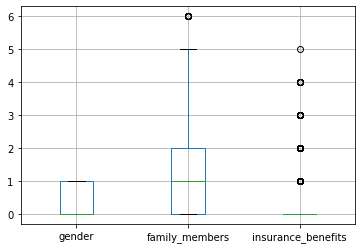

In [121]:
df.boxplot(columns)

<AxesSubplot:>

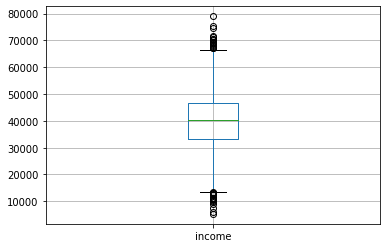

In [122]:
df.boxplot('income')

In [123]:
columns = ['gender', 'income','family_members']

In [124]:
df.isnull().sum()

gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
dtype: int64

In [125]:
df = df.dropna(axis = 0)

In [126]:
df.isnull().sum()

gender                0
age                   0
income                0
family_members        0
insurance_benefits    0
dtype: int64

In [127]:
df.duplicated().sum()

153

Steps of data preparation:

1. Initially no missing values ​​were found.

2. We searched for exceptional values, after we found them we turned them into missing values ​​- and removed them from the data set.

3. We were looking for duplicates -although duplicates have been found, there is no specific identifier for each person, so it could very well be that these are different people who simply have identical data, so we will not delete the duplicates.

## EDA

Let's quickly check whether there are certain groups of customers by looking at the pair plot.

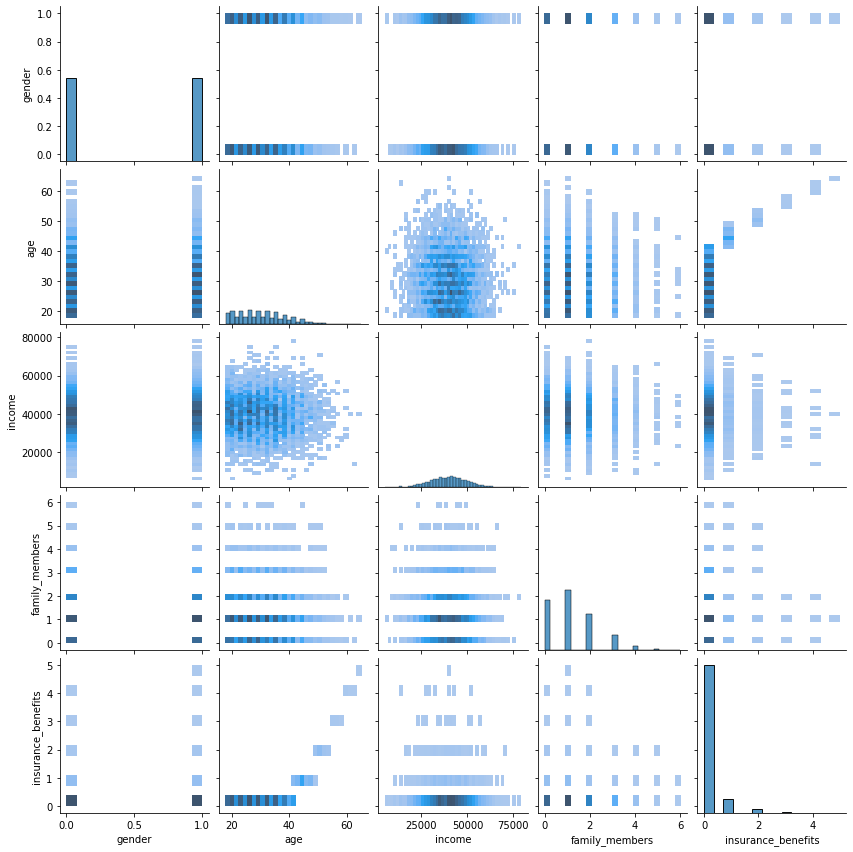

In [128]:
g = sns.pairplot(df, kind='hist')
g.fig.set_size_inches(12, 12)

Ok, it is a bit difficult to spot obvious groups (clusters) as it is difficult to combine several variables simultaneously (to analyze multivariate distributions). That's where LA and ML can be quite handy.

# Task 1. Similar Customers

In the language of ML, it is necessary to develop a procedure that returns k nearest neighbors (objects) for a given object based on the distance between the objects.

You may want to review the following lessons (chapter -> lesson)
- Distance Between Vectors -> Euclidean Distance
- Distance Between Vectors -> Manhattan Distance

To solve the task, we can try different distance metrics.

Write a function that returns k nearest neighbors for an $n^{th}$ object based on a specified distance metric. The number of received insurance benefits should not be taken into account for this task. 

You can use a ready implementation of the kNN algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.NearestNeighbors.html#sklearn.neighbors.NearestNeighbors)) or use your own.

Test it for four combination of two cases
- Scaling
  - the data is not scaled
  - the data is scaled with the [MaxAbsScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MaxAbsScaler.html) scaler
- Distance Metrics
  - Euclidean
  - Manhattan

Answer these questions:
- Does the data being not scaled affect the kNN algorithm? If so, how does that appear?
- How similar are the results using the Manhattan distance metric (regardless of the scaling)?

In [129]:
feature_names = ['gender', 'age', 'income', 'family_members']

In [130]:
def get_knn(df, n, k, metric):
    
    """
    Returns k nearest neighbors

    :param df: pandas dataframe used to find similar objects within
    :param n: object no for which the nearest neighbours are looked for
    :param k: the number of the nearest neighbours to return
    :param metric: name of distance metric
    """

    nbrs = sklearn.neighbors.NearestNeighbors(n_neighbors=k, algorithm='brute', metric=metric).fit(df[feature_names])
    nbrs_distances, nbrs_indices = nbrs.kneighbors([df.iloc[n][feature_names]], k, return_distance=True)
    
    df_res = pd.concat([
        df.iloc[nbrs_indices[0]], 
        pd.DataFrame(nbrs_distances.T, index=nbrs_indices[0], columns=['distance'])
        ], axis=1)
    
    print(df_res)

In [131]:
k=5
n = 4
metric = 'euclidean'

df_nn = get_knn(df, n=n, k=k, metric=metric)
df_nn

      gender  age   income  family_members  insurance_benefits  distance
4          1   28  26100.0               0                   0  0.000000
2701       1   31  26100.0               3                   0  4.242641
2773       1   24  26100.0               2                   0  4.472136
3346       0   34  26100.0               0                   0  6.082763
4721       1   22  26100.0               2                   0  6.324555


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Scaling the data.

In [132]:
feature_names = ['gender', 'age', 'income', 'family_members']

transformer_mas = sklearn.preprocessing.MaxAbsScaler().fit(df[feature_names].to_numpy())

df_scaled = df.copy()
df_scaled.loc[:, feature_names] = transformer_mas.transform(df[feature_names].to_numpy())

In [133]:
df_scaled.sample(5)

,gender,age,income,family_members,insurance_benefits
2052,1.0,0.753846,0.500000,0.000000,2
2251,0.0,0.353846,0.572152,0.000000,0
3942,1.0,0.307692,0.579747,0.000000,0
4887,1.0,0.400000,0.645570,0.000000,0
4411,1.0,0.338462,0.512658,0.166667,0


Now, let's get similar records for a given one for every combination

In [167]:
get_knn(df[feature_names], 4, 5, metric='euclidean')

      gender  age   income  family_members  distance
4          1   28  26100.0               0  0.000000
2701       1   31  26100.0               3  4.242641
2773       1   24  26100.0               2  4.472136
3346       0   34  26100.0               0  6.082763
4721       1   22  26100.0               2  6.324555


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [166]:
get_knn(df[feature_names], 4, 5, metric='manhattan')

      gender  age   income  family_members  distance
4          1   28  26100.0               0       0.0
2773       1   24  26100.0               2       6.0
2701       1   31  26100.0               3       6.0
3346       0   34  26100.0               0       7.0
4721       1   22  26100.0               2       8.0


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [136]:
get_knn(df_scaled[feature_names], 4, 5, metric='euclidean')

      gender       age    income  family_members  distance
4        1.0  0.430769  0.330380             0.0  0.000000
349      1.0  0.430769  0.322785             0.0  0.007595
3934     1.0  0.430769  0.321519             0.0  0.008861
3665     1.0  0.430769  0.317722             0.0  0.012658
1435     1.0  0.446154  0.331646             0.0  0.015437


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


In [137]:
get_knn(df_scaled[feature_names], 4, 5, metric='manhattan')

      gender       age    income  family_members  distance
4        1.0  0.430769  0.330380             0.0  0.000000
349      1.0  0.430769  0.322785             0.0  0.007595
3934     1.0  0.430769  0.321519             0.0  0.008861
3665     1.0  0.430769  0.317722             0.0  0.012658
1435     1.0  0.446154  0.331646             0.0  0.016650


/opt/conda/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but NearestNeighbors was fitted with feature names
  warnings.warn(


Answers to the questions

**Does the data being not scaled affect the kNN algorithm? If so, how does that appear?** 

When the data were not scaled, the distances were much greater.

**How similar are the results using the Manhattan distance metric (regardless of the scaling)?** 

Exactly the same in the scale data, in the regular data it seems to have a little diffrent.

# Task 2. Is Customer Likely to Receive Insurance Benefit?

In terms of machine learning we can look at this like a binary classification task.

With `insurance_benefits` being more than zero as the target, evaluate whether the kNN classification approach can do better than a dummy model.

Instructions:
- Build a KNN-based classifier and measure its quality with the F1 metric for k=1..10 for both the original data and the scaled one. That'd be interesting to see how k may influece the evaluation metric, and whether scaling the data makes any difference. You can use a ready implemention of the kNN classification algorithm from scikit-learn (check [the link](https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)) or use your own.
- Build the dummy model which is just random for this case. It should return "1" with some probability. Let's test the model with four probability values: 0, the probability of paying any insurance benefit, 0.5, 1.

The probability of paying any insurance benefit can be defined as

$$
P\{\text{insurance benefit received}\}=\frac{\text{number of clients received any insurance benefit}}{\text{total number of clients}}.
$$

Split the whole data in the 70:30 proportion for the training/testing parts.

In [138]:
# calculate the target

df['insurance_benefits_received'] = (df['insurance_benefits'] > 0).astype('int')

In [139]:
# check for the class imbalance with value_counts()

df['insurance_benefits_received'].value_counts()

0    4436
1     564
Name: insurance_benefits_received, dtype: int64

In [140]:
df_scaled['insurance_benefits_received'] = (df_scaled['insurance_benefits'] > 0).astype('int')

In [141]:
df_scaled['insurance_benefits_received'].value_counts()

0    4436
1     564
Name: insurance_benefits_received, dtype: int64

In [142]:
def eval_classifier(y_true, y_pred):
    
    f1_score = sklearn.metrics.f1_score(y_true, y_pred)
    print(f'F1: {f1_score:.2f}')
    
# if you have an issue with the following line, restart the kernel and run the notebook again
    cm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='all')
    print('Confusion Matrix')
    print(cm)

In [143]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits_received'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
for k in range(1,10):
    
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)

    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    eval_classifier(y_test, y_test_pred)

F1: 0.62
Confusion Matrix
[[0.87133333 0.02      ]
 [0.05133333 0.05733333]]
F1: 0.41
Confusion Matrix
[[0.88733333 0.004     ]
 [0.08       0.02866667]]
F1: 0.41
Confusion Matrix
[[0.88       0.01133333]
 [0.07733333 0.03133333]]
F1: 0.28
Confusion Matrix
[[0.88866667 0.00266667]
 [0.09066667 0.018     ]]
F1: 0.27
Confusion Matrix
[[0.88533333 0.006     ]
 [0.09066667 0.018     ]]
F1: 0.11
Confusion Matrix
[[0.89       0.00133333]
 [0.102      0.00666667]]
F1: 0.11
Confusion Matrix
[[0.88866667 0.00266667]
 [0.102      0.00666667]]
F1: 0.07
Confusion Matrix
[[0.89133333 0.        ]
 [0.10466667 0.004     ]]
F1: 0.08
Confusion Matrix
[[0.89133333 0.        ]
 [0.104      0.00466667]]


In [144]:
X = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df_scaled['insurance_benefits_received'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)
for k in range(1,10):
    
    model = sklearn.neighbors.KNeighborsClassifier(n_neighbors=k)

    model.fit(X_train, y_train)

    y_test_pred = model.predict(X_test)
    eval_classifier(y_test, y_test_pred)

F1: 0.97
Confusion Matrix
[[0.88866667 0.00266667]
 [0.00466667 0.104     ]]
F1: 0.93
Confusion Matrix
[[8.90666667e-01 6.66666667e-04]
 [1.40000000e-02 9.46666667e-02]]
F1: 0.95
Confusion Matrix
[[0.88933333 0.002     ]
 [0.00866667 0.1       ]]
F1: 0.91
Confusion Matrix
[[0.88933333 0.002     ]
 [0.01666667 0.092     ]]
F1: 0.92
Confusion Matrix
[[0.88666667 0.00466667]
 [0.01133333 0.09733333]]
F1: 0.90
Confusion Matrix
[[0.89       0.00133333]
 [0.018      0.09066667]]
F1: 0.92
Confusion Matrix
[[0.88733333 0.004     ]
 [0.01266667 0.096     ]]
F1: 0.90
Confusion Matrix
[[0.88866667 0.00266667]
 [0.01733333 0.09133333]]
F1: 0.92
Confusion Matrix
[[0.88866667 0.00266667]
 [0.01466667 0.094     ]]


It seems that changing the scale of the data set had a very positive effect on the F1 index and raised it significantly.
It also seems that the number of K has no significant effect on the F1 score, but the optimal result was at K=1.

In [145]:
# generating output of a random model

def rnd_model_predict(P, size, seed=42):

    rng = np.random.default_rng(seed=seed)
    return rng.binomial(n=1, p=P, size=size)

In [146]:
for P in [0, df['insurance_benefits_received'].sum() / len(df), 0.5, 1]:

    print(f'The probability: {P:.2f}')
    y_pred_rnd = rnd_model_predict(P, len(df), seed=42)
        
    eval_classifier(df['insurance_benefits_received'], y_pred_rnd)
    
    print()

The probability: 0.00
F1: 0.00
Confusion Matrix
[[0.8872 0.    ]
 [0.1128 0.    ]]

The probability: 0.11
F1: 0.12
Confusion Matrix
[[0.7914 0.0958]
 [0.0994 0.0134]]

The probability: 0.50
F1: 0.20
Confusion Matrix
[[0.456  0.4312]
 [0.053  0.0598]]

The probability: 1.00
F1: 0.20
Confusion Matrix
[[0.     0.8872]
 [0.     0.1128]]



Our model's F1 score is better than the dummy model.

# Task 3. Regression (with Linear Regression)

With `insurance_benefits` as the target, evaluate what RMSE would be for a Linear Regression model.

Build your own implementation of LR. For that, recall how the linear regression task's solution is formulated in terms of LA. Check RMSE for both the original data and the scaled one. Can you see any difference in RMSE between these two cases?

Let's denote
- $X$ — feature matrix, each row is a case, each column is a feature, the first column consists of unities
- $y$ — target (a vector)
- $\hat{y}$ — estimated tagret (a vector)
- $w$ — weight vector

The task of linear regression in the language of matrices can be formulated as

$$
y = Xw
$$

The training objective then is to find such $w$ that it would minimize the L2-distance (MSE) between $Xw$ and $y$:

$$
\min_w d_2(Xw, y) \quad \text{or} \quad \min_w \text{MSE}(Xw, y)
$$

It appears that there is analytical solution for the above:

$$
w = (X^T X)^{-1} X^T y
$$

The formula above can be used to find the weights $w$ and the latter can be used to calculate predicted values

$$
\hat{y} = X_{val}w
$$

Split the whole data in the 70:30 proportion for the training/validation parts. Use the RMSE metric for the model evaluation.

In [147]:
class MyLinearRegression:
    
    def __init__(self):
        
        self.weights = None
    
    def fit(self, X, y):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)# <your code here>

    def predict(self, X):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)# <your code here>
        y_pred = X2.dot(self.weights)# <your code here>
        
        return y_pred

In [148]:
def eval_regressor(y_true, y_pred):
    
    rmse = math.sqrt(sklearn.metrics.mean_squared_error(y_true, y_pred))
    print(f'RMSE: {rmse:.2f}')
    
    r2_score = math.sqrt(sklearn.metrics.r2_score(y_true, y_pred))
    print(f'R2: {r2_score:.2f}')    

In [149]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


In [150]:
X_s = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y_s = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=12345)

lr = MyLinearRegression()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.94353901  2.32372069  0.01642727 -0.02059875 -0.07014128]
RMSE: 0.34
R2: 0.66


Both sets of data give exactly the same result in both indices - 

conclusion:
The scaling on the data set was not significant in the current model.

# Task 4. Obfuscating Data

It best to obfuscate data by multiplying the numerical features (remember, they can be seen as the matrix $X$) by an invertible matrix $P$. 

$$
X' = X \times P
$$

Try to do that and check how the features' values will look like after the transformation. By the way, the intertible property is important here so make sure that $P$ is indeed invertible.

You may want to review the 'Matrices and Matrix Operations -> Matrix Multiplication' lesson to recall the rule of matrix multiplication and its implementation with NumPy.

In [151]:
personal_info_column_list = ['gender', 'age', 'income', 'family_members']
df_pn = df[personal_info_column_list]

In [152]:
X = df_pn.to_numpy()

Generating a random matrix $P$.

In [153]:
rng = np.random.default_rng(seed=42)
P = rng.random(size=(X.shape[1], X.shape[1]))

Checking the matrix $P$ is invertible

In [154]:
np.linalg.inv(P)

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

Can you guess the customers' ages or income after the transformation?

Yes, the age or income will be the difference between the number and 0/1 (depending on the position of the number in the column).

Can you recover the original data from $X'$ if you know $P$? Try to check that with calculations by moving $P$ from the right side of the formula above to the left one. The rules of matrix multiplcation are really helpful here.

In [155]:
np.dot(np.dot(X, P), np.linalg.inv(P))

array([[ 1.00000000e+00,  4.10000000e+01,  4.96000000e+04,
         1.00000000e+00],
       [ 1.67952800e-12,  4.60000000e+01,  3.80000000e+04,
         1.00000000e+00],
       [-6.23021448e-13,  2.90000000e+01,  2.10000000e+04,
        -2.03032656e-13],
       ...,
       [ 1.57996161e-12,  2.00000000e+01,  3.39000000e+04,
         2.00000000e+00],
       [ 1.00000000e+00,  2.20000000e+01,  3.27000000e+04,
         3.00000000e+00],
       [ 1.00000000e+00,  2.80000000e+01,  4.06000000e+04,
         1.00000000e+00]])

Print all three cases for a few customers
- The original data
- The transformed one
- The reversed (recovered) one

In [156]:
P

array([[0.77395605, 0.43887844, 0.85859792, 0.69736803],
       [0.09417735, 0.97562235, 0.7611397 , 0.78606431],
       [0.12811363, 0.45038594, 0.37079802, 0.92676499],
       [0.64386512, 0.82276161, 0.4434142 , 0.22723872]])

In [157]:
np.linalg.inv(P)

array([[ 0.41467992, -1.43783972,  0.62798546,  1.14001268],
       [-1.06101789,  0.44219337,  0.1329549 ,  1.18425933],
       [ 1.42362442,  1.60461607, -2.0553823 , -1.53699695],
       [-0.11128575, -0.65813802,  1.74995517, -0.11816316]])

In [158]:
X

array([[1.00e+00, 4.10e+01, 4.96e+04, 1.00e+00],
       [0.00e+00, 4.60e+01, 3.80e+04, 1.00e+00],
       [0.00e+00, 2.90e+01, 2.10e+04, 0.00e+00],
       ...,
       [0.00e+00, 2.00e+01, 3.39e+04, 2.00e+00],
       [1.00e+00, 2.20e+01, 3.27e+04, 3.00e+00],
       [1.00e+00, 2.80e+01, 4.06e+04, 1.00e+00]])

## Proof That Data Obfuscation Can Work with LR

The regression task has been solved with linear regression in this project. Your next task is to prove _analytically_ that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. Can you believe that? Well, you don't have to, you should prove it!

So, the data is obfuscated and there is $X \times P$ instead of just $X$ now. Consequently, there are other weights $w_P$ as
$$
w = (X^T X)^{-1} X^T y \quad \Rightarrow \quad w_P = [(XP)^T XP]^{-1} (XP)^T y
$$

How would $w$ and $w_P$ be linked if you simplify the formula for $w_P$ above? 

What would be predicted values with $w_P$? 

What does that mean for the quality of linear regression if you measure it with RMSE?

Check Appendix B Properties of Matrices in the end of the notebook. There are useful formulas in there!

No code is necessary in this section, only analytical explanation!

**Answer**

Given X~=XP for P an invertible matrix, we have

β(X~)=
(X~TX~)−1X~Ty=
(PTXTXP)−1PTXTy
=P−1(XTX)−1P−TPTXTy=
P−1(XTX)−1(PP−1)TXTy=
P−1(XTX)−1XTy=
P−1β(X)
which uses the facts that (AB)−1=B−1A−1 and (AB)T=BTAT. This should make it clear that the only difference in the coefficients compared to the usual case is a is a factor P−1.

Whether or not this is small or a large difference in the coefficients compared to using X instead of XP depends on the choice of P.

As an example, we would expect a diagonal P with diagonal elements close to 1 to be very similar; in the case that all diagonal elements are exactly 1, then P=I and it should be obvious why this special case would result in estimating the same coefficients.
However, looking at the model predictions, we see that the P−1 factor must cancel out:

Xβ(X)=Xβ(X)=XPP−1β(X)=X~β(X~)

**Analytical proof**

## Test Linear Regression With Data Obfuscation

Now, let's prove Linear Regression can work computationally with the chosen obfuscation transformation.

Build a procedure or a class that runs Linear Regression optionally with the obfuscation. You can use either a ready implementation of Linear Regression from sciki-learn or your own.

Run Linear Regression for the original data and the obfuscated one, compare the predicted values and the RMSE, $R^2$ metric values. Is there any difference?

**Procedure**

- Create a square matrix $P$ of random numbers.
- Check that it is invertible. If not, repeat the first point until we get an invertible matrix.
- <! your comment here !>
- Use $XP$ as the new feature matrix

In [162]:
k = rng.random(size=(5000,4))
k.shape

(5000, 4)

In [163]:
class MyLinearRegression1:
    
    def __init__(self):
        
        self.weights = None
        self.X =X*k
    def fit(self, X, y):
        
        # adding the unities
        
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)
        self.weights = np.linalg.inv(X2.T.dot(X2)).dot(X2.T).dot(y)# <your code here>
        
    def predict(self, X):
        
        # adding the unities
        X2 = np.append(np.ones([len(X), 1]), X, axis=1)# <your code here>
        y_pred = X2.dot(self.weights)# <your code here>
        
        return y_pred

In [164]:
X = df[['age', 'gender', 'income', 'family_members']].to_numpy()
y = df['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=12345)

lr = MyLinearRegression1()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-9.43539012e-01  3.57495491e-02  1.64272726e-02 -2.60743659e-07
 -1.16902127e-02]
RMSE: 0.34
R2: 0.66


In [165]:
X_s = df_scaled[['age', 'gender', 'income', 'family_members']].to_numpy()
y_s = df_scaled['insurance_benefits'].to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X_s, y_s, test_size=0.3, random_state=12345)

lr = MyLinearRegression1()

lr.fit(X_train, y_train)
print(lr.weights)

y_test_pred = lr.predict(X_test)
eval_regressor(y_test, y_test_pred)

[-0.94353901  2.32372069  0.01642727 -0.02059875 -0.07014128]
RMSE: 0.34
R2: 0.66


# Conclusions

1. Task 2 - Changing the scale of the data set had a very positive effect on the F1 index and raised it significantly. It also seems that the number of K has no significant effect on the F1 score, but the optimal result was at K=1.

2. Task 3 - Both sets of data give exactly the same result in both indices -

conclusion: The scaling on the data set was not significant in the current model.

3. Task 4 - We prove analytically that the given obfuscation method won't affect linear regression in terms of predicted values i.e. their values will remain the same. 

4. task 5 - The new model we will develop which blurs the customer data gives exactly the same scores as the original model.

Conclusion - The blurring of the data does not harm the model, both in the original data set and in the scaled one.